<a href="https://colab.research.google.com/github/kadirdundar/kadirdundar/blob/main/ara%C3%A7_fiyat_tahmini_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sklearn
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Coll/gercekveri/merc.xlsx")

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [ ]:
df.isnull().sum()#null olan veri nerede kaç tane var öğreniyoruz

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
newdf = df.sort_values(["price"], ascending=False).iloc[131:]#en pahalı 131 arabadan sonrasını aldık

In [ ]:
newdf = newdf[newdf.year != 1970]#1970 deki araç outlier olduğu için dahil değil

In [ ]:
newdf = newdf.drop("transmission", axis=1)

In [ ]:
y = newdf["price"].values
x = newdf.drop("price", axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)



Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 672140672.0000 - val_loss: 688095040.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672108416.0000 - val_loss: 688038016.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 672000768.0000 - val_loss: 687843776.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671660480.0000 - val_loss: 687273664.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 670739392.0000 - val_loss: 685816960.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 668520640.0000 - val_loss: 682433280.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 663513472.0000 - val_loss: 675062464.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 653326848.0000 - val_loss: 660908864.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6348131

In [ ]:
kayipverisi=pd.DataFrame(model.history.history)

In [ ]:
kayipverisi

,loss,val_loss
0,672140672.0,688095040.0
1,672108416.0,688038016.0
2,672000768.0,687843776.0
3,671660480.0,687273664.0
4,670739392.0,685816960.0
...,...,...
295,18938286.0,20489256.0
296,18924544.0,20487212.0
297,18911892.0,20494526.0
298,18914978.0,20498198.0


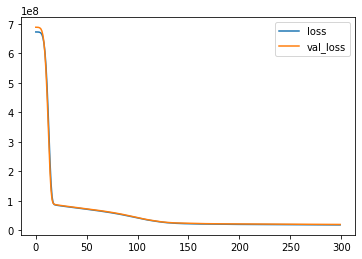

In [ ]:
kayipverisi.plot()

In [ ]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [ ]:
tahminDizisi=model.predict(x_test)

In [ ]:
tahminDizisi

array([[22643.033],
       [23928.297],
       [24988.426],
       ...,
       [26317.53 ],
       [13180.778],
       [24891.098]], dtype=float32)

In [ ]:
mean_absolute_error(y_test,tahminDizisi)#hata payımız

3226.685352101276